In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder,OneHotEncoder,OrdinalEncoder,StandardScaler,MinMaxScaler
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('/content/House_Pricing.csv')
data.head()

,ID,Date House was Sold,Sale Price,No of Bedrooms,No of Bathrooms,Flat Area (in Sqft),Lot Area (in Sqft),No of Floors,Waterfront View,No of Times Visited,...,Overall Grade,Area of the House from Basement (in Sqft),Basement Area (in Sqft),Age of House (in Years),Renovated Year,Zipcode,Latitude,Longitude,Living Area after Renovation (in Sqft),Lot Area after Renovation (in Sqft)
0,7129300520,14 October 2017,221900.0,3,1.00,1180.0,5650.0,1.0,No,NaN,...,7,1180.0,0,63,0,98178.0,47.5112,-122.257,1340.0,5650
1,6414100192,14 December 2017,538000.0,3,2.25,2570.0,7242.0,2.0,No,NaN,...,7,2170.0,400,67,1991,98125.0,47.7210,-122.319,1690.0,7639
2,5631500400,15 February 2016,180000.0,2,1.00,770.0,10000.0,1.0,No,NaN,...,6,770.0,0,85,0,98028.0,47.7379,-122.233,2720.0,8062
3,2487200875,14 December 2017,604000.0,4,3.00,1960.0,5000.0,1.0,No,NaN,...,7,1050.0,910,53,0,98136.0,47.5208,-122.393,1360.0,5000
4,1954400510,15 February 2016,510000.0,3,2.00,1680.0,8080.0,1.0,No,NaN,...,8,1680.0,0,31,0,98074.0,47.6168,-122.045,1800.0,7503


In [3]:
data.shape

(21613, 21)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   ID                                         21613 non-null  int64  
 1   Date House was Sold                        21613 non-null  object 
 2   Sale Price                                 21609 non-null  float64
 3   No of Bedrooms                             21613 non-null  int64  
 4   No of Bathrooms                            21609 non-null  float64
 5   Flat Area (in Sqft)                        21604 non-null  float64
 6   Lot Area (in Sqft)                         21604 non-null  float64
 7   No of Floors                               21613 non-null  float64
 8   Waterfront View                            21613 non-null  object 
 9   No of Times Visited                        2124 non-null   object 
 10  Condition of the House

In [5]:
data.describe()

,ID,Sale Price,No of Bedrooms,No of Bathrooms,Flat Area (in Sqft),Lot Area (in Sqft),No of Floors,Overall Grade,Area of the House from Basement (in Sqft),Basement Area (in Sqft),Age of House (in Years),Renovated Year,Zipcode,Latitude,Longitude,Living Area after Renovation (in Sqft),Lot Area after Renovation (in Sqft)
count,2.161300e+04,2.160900e+04,21613.000000,21609.000000,21604.000000,2.160400e+04,21613.000000,21613.000000,21610.000000,21613.000000,21613.000000,21613.000000,21612.000000,21612.000000,21612.000000,21612.000000,21613.000000
mean,4.580302e+09,5.401984e+05,3.370842,2.114732,2079.931772,1.510776e+04,1.494309,7.623467,1788.344193,291.509045,46.994864,84.402258,98077.937766,47.560048,-122.213892,1986.538914,12768.455652
std,2.876566e+09,3.673890e+05,0.930062,0.770138,918.487597,4.142827e+04,0.539989,1.105439,827.982604,442.575043,29.373411,401.679240,53.505425,0.138565,0.140830,685.404255,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,1.000000,290.000000,0.000000,3.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1429.250000,5.040000e+03,1.000000,7.000000,1190.000000,0.000000,21.000000,0.000000,98033.000000,47.470975,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.617500e+03,1.500000,7.000000,1560.000000,0.000000,43.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068825e+04,2.000000,8.000000,2210.000000,560.000000,67.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,10.000000,9410.000000,4820.000000,118.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [6]:
data.isna().sum()

ID                                               0
Date House was Sold                              0
Sale Price                                       4
No of Bedrooms                                   0
No of Bathrooms                                  4
Flat Area (in Sqft)                              9
Lot Area (in Sqft)                               9
No of Floors                                     0
Waterfront View                                  0
No of Times Visited                          19489
Condition of the House                           0
Overall Grade                                    0
Area of the House from Basement (in Sqft)        3
Basement Area (in Sqft)                          0
Age of House (in Years)                          0
Renovated Year                                   0
Zipcode                                          1
Latitude                                         1
Longitude                                        1
Living Area after Renovation (i

In [7]:
data['Condition of the House'].unique()

array(['Fair', 'Excellent', 'Good', 'Bad', 'Okay'], dtype=object)

In [8]:
data['Waterfront View'].unique()

array(['No', 'Yes'], dtype=object)

In [9]:
data['No of Times Visited'].unique()

array([nan, 'Thrice', 'Four', 'Twice', 'Once'], dtype=object)

In [10]:
data.drop(columns = ['No of Times Visited'],inplace = True)
data.head()

,ID,Date House was Sold,Sale Price,No of Bedrooms,No of Bathrooms,Flat Area (in Sqft),Lot Area (in Sqft),No of Floors,Waterfront View,Condition of the House,Overall Grade,Area of the House from Basement (in Sqft),Basement Area (in Sqft),Age of House (in Years),Renovated Year,Zipcode,Latitude,Longitude,Living Area after Renovation (in Sqft),Lot Area after Renovation (in Sqft)
0,7129300520,14 October 2017,221900.0,3,1.00,1180.0,5650.0,1.0,No,Fair,7,1180.0,0,63,0,98178.0,47.5112,-122.257,1340.0,5650
1,6414100192,14 December 2017,538000.0,3,2.25,2570.0,7242.0,2.0,No,Fair,7,2170.0,400,67,1991,98125.0,47.7210,-122.319,1690.0,7639
2,5631500400,15 February 2016,180000.0,2,1.00,770.0,10000.0,1.0,No,Fair,6,770.0,0,85,0,98028.0,47.7379,-122.233,2720.0,8062
3,2487200875,14 December 2017,604000.0,4,3.00,1960.0,5000.0,1.0,No,Excellent,7,1050.0,910,53,0,98136.0,47.5208,-122.393,1360.0,5000
4,1954400510,15 February 2016,510000.0,3,2.00,1680.0,8080.0,1.0,No,Fair,8,1680.0,0,31,0,98074.0,47.6168,-122.045,1800.0,7503


In [11]:
data.isna().sum()

ID                                           0
Date House was Sold                          0
Sale Price                                   4
No of Bedrooms                               0
No of Bathrooms                              4
Flat Area (in Sqft)                          9
Lot Area (in Sqft)                           9
No of Floors                                 0
Waterfront View                              0
Condition of the House                       0
Overall Grade                                0
Area of the House from Basement (in Sqft)    3
Basement Area (in Sqft)                      0
Age of House (in Years)                      0
Renovated Year                               0
Zipcode                                      1
Latitude                                     1
Longitude                                    1
Living Area after Renovation (in Sqft)       1
Lot Area after Renovation (in Sqft)          0
dtype: int64

In [12]:
import seaborn as sns

<Axes: xlabel='No of Bathrooms', ylabel='Count'>

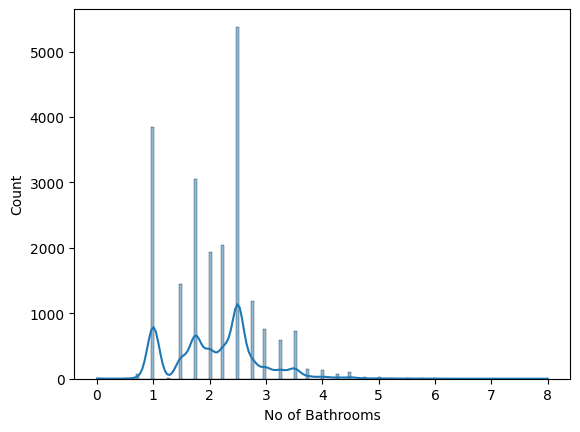

In [13]:
sns.histplot(data['No of Bathrooms'],kde= True)

<Axes: xlabel='Sale Price', ylabel='Count'>

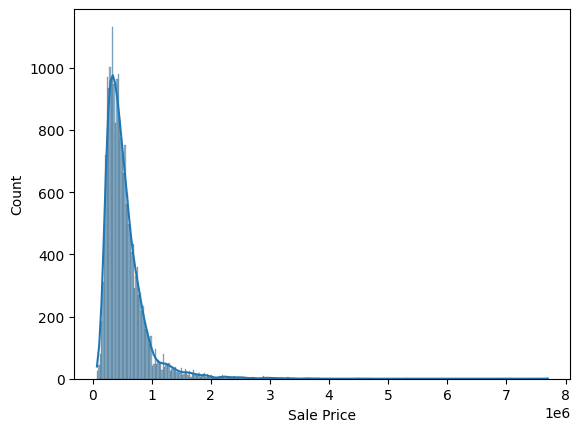

In [14]:
sns.histplot(data['Sale Price'],kde= True)

<Axes: xlabel='Flat Area (in Sqft)', ylabel='Count'>

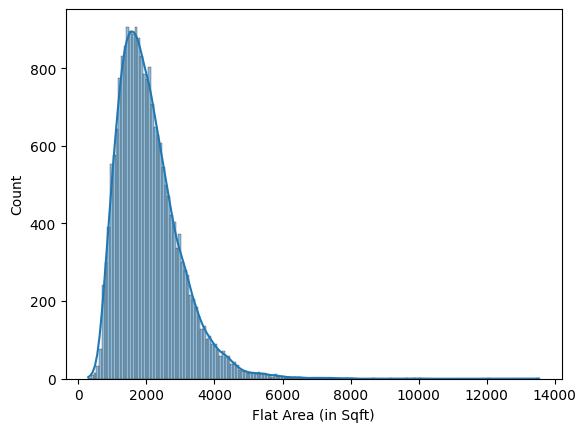

In [15]:
sns.histplot(data['Flat Area (in Sqft)'],kde= True)

<Axes: xlabel='Lot Area (in Sqft)', ylabel='Count'>

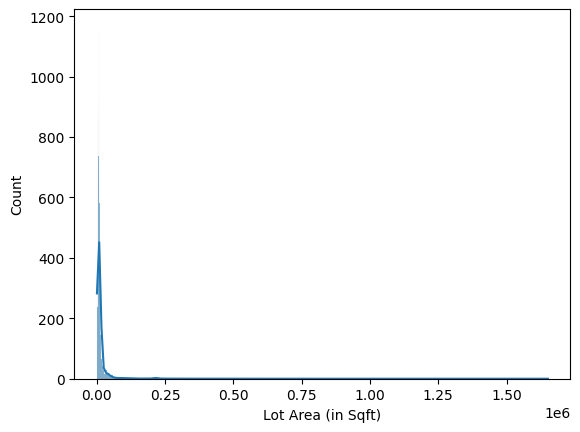

In [16]:
sns.histplot(data['Lot Area (in Sqft)'],kde= True)

<Axes: xlabel='Area of the House from Basement (in Sqft)', ylabel='Count'>

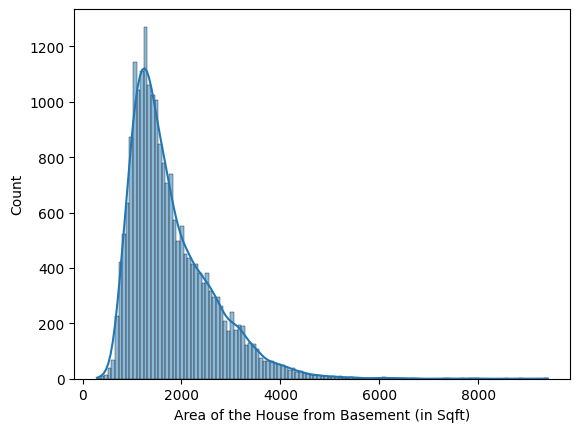

In [17]:
sns.histplot(data['Area of the House from Basement (in Sqft)'],kde= True)

<Axes: xlabel='Living Area after Renovation (in Sqft)', ylabel='Count'>

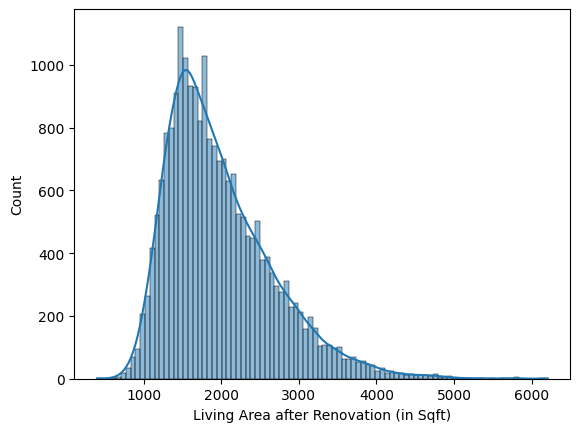

In [18]:
sns.histplot(data['Living Area after Renovation (in Sqft)'],kde= True)

In [19]:
data['Flat Area (in Sqft)'].fillna(data['Flat Area (in Sqft)'].mean(),inplace=True)
data['Sale Price'].fillna(data['Sale Price'].mean(),inplace=True)
data['Lot Area (in Sqft)'].fillna(data['Lot Area (in Sqft)'].mean(),inplace=True)
data['Area of the House from Basement (in Sqft)'].fillna(data['Area of the House from Basement (in Sqft)'].mean(),inplace=True)
data['Living Area after Renovation (in Sqft)'].fillna(data['Living Area after Renovation (in Sqft)'].mean(),inplace=True)

In [20]:
data.isna().sum()

ID                                           0
Date House was Sold                          0
Sale Price                                   0
No of Bedrooms                               0
No of Bathrooms                              4
Flat Area (in Sqft)                          0
Lot Area (in Sqft)                           0
No of Floors                                 0
Waterfront View                              0
Condition of the House                       0
Overall Grade                                0
Area of the House from Basement (in Sqft)    0
Basement Area (in Sqft)                      0
Age of House (in Years)                      0
Renovated Year                               0
Zipcode                                      1
Latitude                                     1
Longitude                                    1
Living Area after Renovation (in Sqft)       0
Lot Area after Renovation (in Sqft)          0
dtype: int64

In [21]:
data['No of Bathrooms'].mode()

0    2.5
Name: No of Bathrooms, dtype: float64

In [22]:
data['Latitude'].mode()

0    47.5322
1    47.5491
2    47.6624
3    47.6846
Name: Latitude, dtype: float64

In [23]:
data['Longitude'].mode()

0   -122.29
Name: Longitude, dtype: float64

In [24]:
data['Zipcode'].mode()

0    98103.0
Name: Zipcode, dtype: float64

In [25]:
data['No of Bathrooms'].fillna(data['No of Bathrooms'].mode()[0],inplace=True)
data['Zipcode'].fillna(data['Zipcode'].mode()[0],inplace=True)
data['Longitude'].fillna(data['Longitude'].mode()[0],inplace=True)
data['Latitude'].fillna(data['Latitude'].mode()[0],inplace=True)


In [26]:
data.isna().sum()

ID                                           0
Date House was Sold                          0
Sale Price                                   0
No of Bedrooms                               0
No of Bathrooms                              0
Flat Area (in Sqft)                          0
Lot Area (in Sqft)                           0
No of Floors                                 0
Waterfront View                              0
Condition of the House                       0
Overall Grade                                0
Area of the House from Basement (in Sqft)    0
Basement Area (in Sqft)                      0
Age of House (in Years)                      0
Renovated Year                               0
Zipcode                                      0
Latitude                                     0
Longitude                                    0
Living Area after Renovation (in Sqft)       0
Lot Area after Renovation (in Sqft)          0
dtype: int64

In [27]:
data.describe()

,ID,Sale Price,No of Bedrooms,No of Bathrooms,Flat Area (in Sqft),Lot Area (in Sqft),No of Floors,Overall Grade,Area of the House from Basement (in Sqft),Basement Area (in Sqft),Age of House (in Years),Renovated Year,Zipcode,Latitude,Longitude,Living Area after Renovation (in Sqft),Lot Area after Renovation (in Sqft)
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.401984e+05,3.370842,2.114804,2079.931772,1.510776e+04,1.494309,7.623467,1788.344193,291.509045,46.994864,84.402258,98077.938926,47.560046,-122.213895,1986.538914,12768.455652
std,2.876566e+09,3.673550e+05,0.930062,0.770085,918.296332,4.141964e+04,0.539989,1.105439,827.925135,442.575043,29.373411,401.679240,53.504458,0.138562,0.140827,685.388397,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,1.000000,290.000000,0.000000,3.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.220000e+05,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,7.000000,1190.000000,0.000000,21.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.620000e+03,1.500000,7.000000,1560.000000,0.000000,43.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.070100e+04,2.000000,8.000000,2210.000000,560.000000,67.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,10.000000,9410.000000,4820.000000,118.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


outliers

In [28]:
to_find_outliers = ['Sale Price','No of Bedrooms','Flat Area (in Sqft)','Lot Area (in Sqft)','Area of the House from Basement (in Sqft)','Basement Area (in Sqft)','Age of House (in Years)','Living Area after Renovation (in Sqft)'	,'Lot Area after Renovation (in Sqft)']

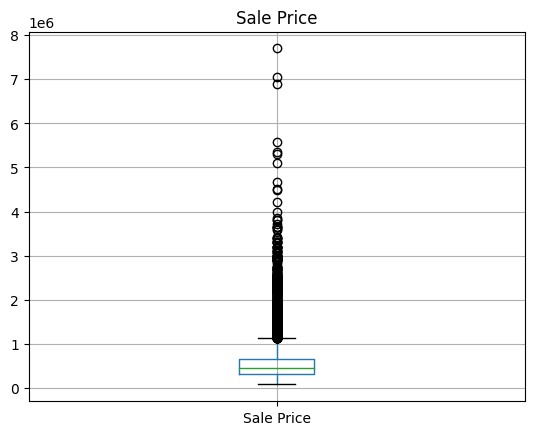

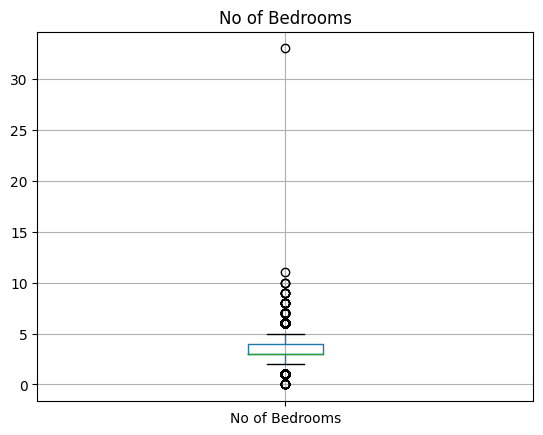

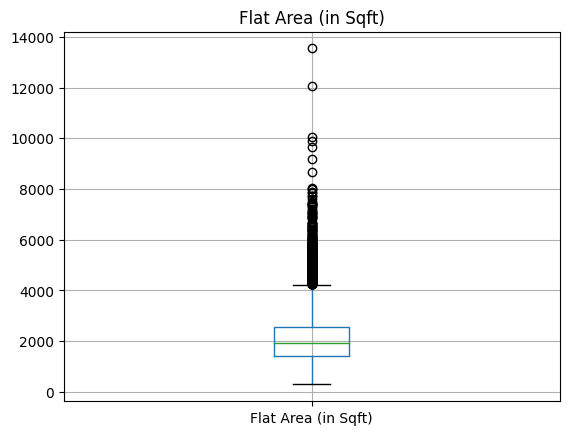

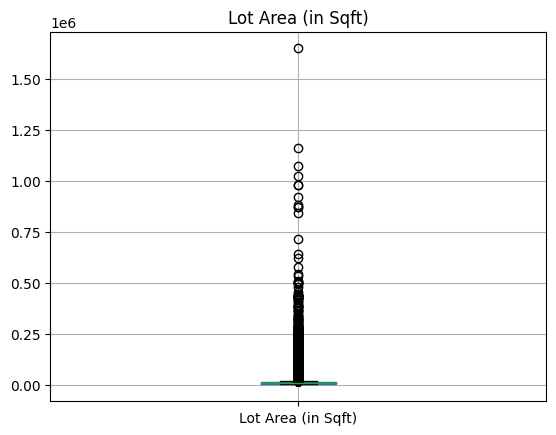

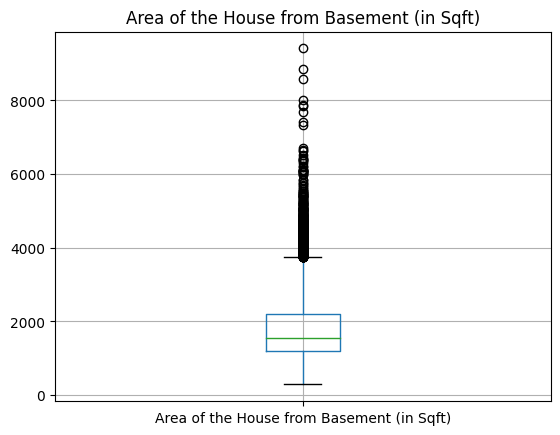

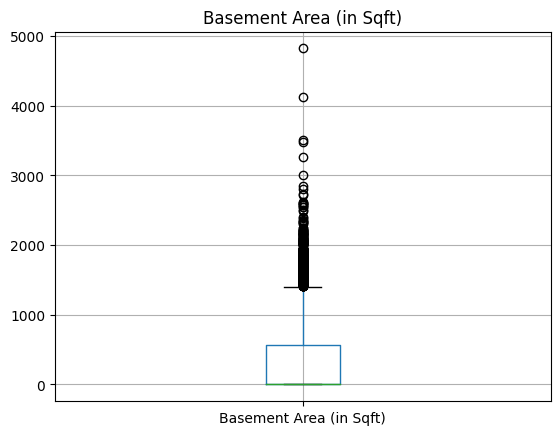

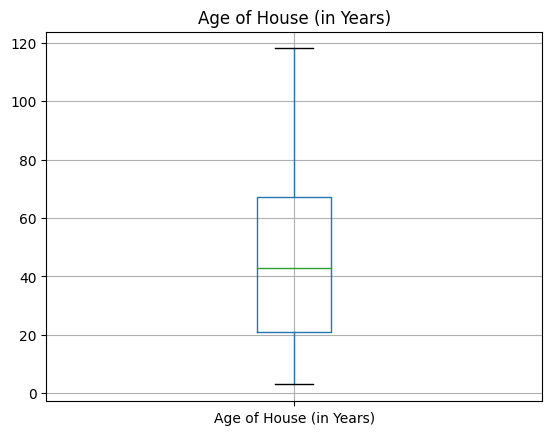

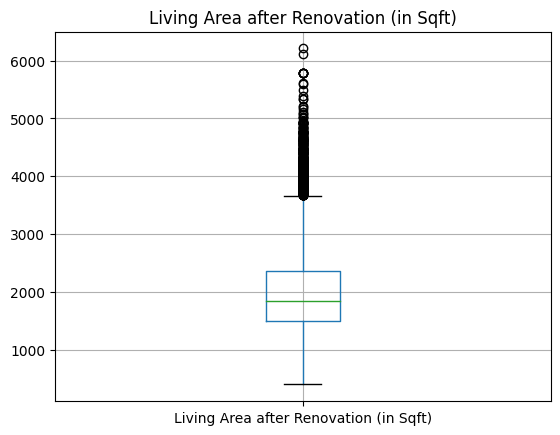

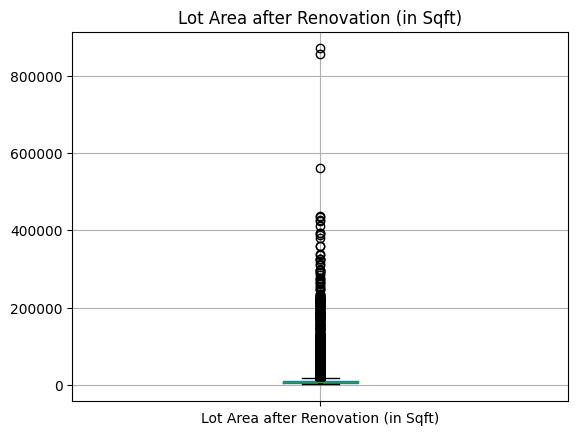

In [29]:
for col in to_find_outliers:
    plt.figure()
    data.boxplot(column=col)
    plt.title(col)
    plt.show()

In [30]:
Q1 = np.percentile(data['Sale Price'],25 ,interpolation = 'midpoint')
Q2= np.percentile(data['Sale Price'],50 ,interpolation = 'midpoint')
Q3 = np.percentile(data['Sale Price'],75, interpolation = 'midpoint')

In [31]:
print(Q1,Q2,Q3)

322000.0 450000.0 645000.0


In [32]:
IQR = Q3-Q1
IQR

323000.0

In [33]:
min_val =   Q1 - 1.5*IQR
max_val =   Q3+1.5*IQR
print(min_val,max_val)

-162500.0 1129500.0


In [34]:
outliers =[]
for x in data['Sale Price']:
  if ((x>max_val)or (x<min_val)):
    outliers.append(x)
outliers

[1230000.0,
 2000000.0,
 1350000.0,
 1330000.0,
 1450000.0,
 2250000.0,
 1510000.0,
 2400000.0,
 2900000.0,
 1370000.0,
 2050000.0,
 3080000.0,
 2380000.0,
 1380000.0,
 1400000.0,
 1350000.0,
 1550000.0,
 1300000.0,
 1450000.0,
 1200000.0,
 1150000.0,
 1390000.0,
 1280000.0,
 1200000.0,
 1490000.0,
 2250000.0,
 1600000.0,
 2130000.0,
 1450000.0,
 1950000.0,
 1220000.0,
 3070000.0,
 1250000.0,
 1150000.0,
 1480000.0,
 1580000.0,
 1300000.0,
 1310000.0,
 2250000.0,
 1360000.0,
 1220000.0,
 2400000.0,
 1270000.0,
 1200000.0,
 1320000.0,
 2450000.0,
 1240000.0,
 1570000.0,
 1130000.0,
 1200000.0,
 1280000.0,
 1960000.0,
 1750000.0,
 5110000.0,
 1150000.0,
 1880000.0,
 1230000.0,
 2300000.0,
 2260000.0,
 5300000.0,
 1200000.0,
 2200000.0,
 1130000.0,
 1180000.0,
 1700000.0,
 1400000.0,
 2540000.0,
 1360000.0,
 1230000.0,
 5350000.0,
 1330000.0,
 1220000.0,
 1250000.0,
 1300000.0,
 1180000.0,
 1380000.0,
 1150000.0,
 1200000.0,
 2250000.0,
 1230000.0,
 1270000.0,
 1680000.0,
 1930000.0,
 118

In [35]:
data['Sale Price'] = data['Sale Price'].clip(min_val,max_val)

In [36]:
Q1 = np.percentile(data['Flat Area (in Sqft)'],25 ,interpolation = 'midpoint')
Q2= np.percentile(data['Flat Area (in Sqft)'],50 ,interpolation = 'midpoint')
Q3 = np.percentile(data['Flat Area (in Sqft)'],75, interpolation = 'midpoint')

In [37]:
print(Q1,Q2,Q3)

1430.0 1910.0 2550.0


In [38]:
IQR = Q3-Q1
IQR

1120.0

In [39]:
min_val =   Q1 - 1.5*IQR
max_val =   Q3+1.5*IQR
print(min_val,max_val)

-250.0 4230.0


In [40]:
outliers =[]
for x in data['Flat Area (in Sqft)']:
  if ((x>max_val)or (x<min_val)):
    outliers.append(x)
outliers

[5420.0,
 4770.0,
 4380.0,
 5180.0,
 4410.0,
 5050.0,
 5310.0,
 4550.0,
 4290.0,
 4290.0,
 4800.0,
 6070.0,
 4870.0,
 4860.0,
 4860.0,
 4410.0,
 4760.0,
 6050.0,
 4740.0,
 5403.0,
 4380.0,
 4640.0,
 6050.0,
 4370.0,
 4570.0,
 4670.0,
 4860.0,
 4270.0,
 4890.0,
 4390.0,
 4250.0,
 5670.0,
 4475.0,
 6070.0,
 4300.0,
 4390.0,
 8010.0,
 4460.0,
 4610.0,
 4380.0,
 4250.0,
 4930.0,
 7390.0,
 4640.0,
 5320.0,
 8000.0,
 6563.0,
 4740.0,
 5450.0,
 4440.0,
 4830.0,
 4280.0,
 4570.0,
 4370.0,
 5710.0,
 5620.0,
 5774.0,
 4470.0,
 4490.0,
 5040.0,
 5770.0,
 5180.0,
 6400.0,
 4490.0,
 6055.0,
 4250.0,
 6300.0,
 4350.0,
 4460.0,
 4340.0,
 4250.0,
 5110.0,
 4700.0,
 4910.0,
 4750.0,
 6840.0,
 4930.0,
 5180.0,
 5130.0,
 6640.0,
 5740.0,
 7350.0,
 4510.0,
 4300.0,
 4870.0,
 5020.0,
 4740.0,
 5370.0,
 4860.0,
 6930.0,
 6550.0,
 6110.0,
 4883.0,
 5010.0,
 4660.0,
 4600.0,
 4910.0,
 5410.0,
 4270.0,
 4520.0,
 5340.0,
 5230.0,
 5370.0,
 4730.0,
 4430.0,
 5780.0,
 6240.0,
 10040.0,
 4250.0,
 5360.0,
 4610.0,


In [41]:
data['Flat Area (in Sqft)'] = data['Flat Area (in Sqft)'].clip(min_val,max_val)

In [42]:
Q1 = np.percentile(data['Living Area after Renovation (in Sqft)'],25 ,interpolation = 'midpoint')
Q2= np.percentile(data['Living Area after Renovation (in Sqft)'],50 ,interpolation = 'midpoint')
Q3 = np.percentile(data['Living Area after Renovation (in Sqft)'],75, interpolation = 'midpoint')
print(Q1,Q2,Q3)
IQR = Q3-Q1
IQR
min_val =   Q1 - 1.5*IQR
max_val =   Q3+1.5*IQR
print(min_val,max_val)
outliers =[]
for x in data['Living Area after Renovation (in Sqft)']:
  if ((x>max_val)or (x<min_val)):
    outliers.append(x)
outliers




1490.0 1840.0 2360.0
185.0 3665.0


[4760.0,
 4110.0,
 3740.0,
 3836.0,
 3890.0,
 4180.0,
 3920.0,
 4550.0,
 3860.0,
 3860.0,
 4050.0,
 4680.0,
 3930.0,
 4300.0,
 3850.0,
 4210.0,
 3980.0,
 3920.0,
 3715.0,
 4190.0,
 4230.0,
 3890.0,
 4100.0,
 4090.0,
 3680.0,
 4100.0,
 3720.0,
 4750.0,
 3950.0,
 5790.0,
 3890.0,
 4320.0,
 4640.0,
 3970.0,
 4600.0,
 3950.0,
 5600.0,
 3820.0,
 3950.0,
 3720.0,
 4800.0,
 3990.0,
 3720.0,
 3860.0,
 3900.0,
 3720.0,
 4060.0,
 3910.0,
 3730.0,
 3760.0,
 3910.0,
 3770.0,
 3960.0,
 4620.0,
 4050.0,
 3860.0,
 3730.0,
 4470.0,
 4890.0,
 3690.0,
 3680.0,
 3780.0,
 3980.0,
 3690.0,
 4240.0,
 3890.0,
 4670.0,
 4050.0,
 4350.0,
 5380.0,
 4330.0,
 3830.0,
 5000.0,
 3680.0,
 4250.0,
 4080.0,
 4110.0,
 4190.0,
 3770.0,
 3736.0,
 4600.0,
 3980.0,
 4170.0,
 4090.0,
 3750.0,
 3680.0,
 4630.0,
 3910.0,
 3880.0,
 4110.0,
 3960.0,
 3710.0,
 3930.0,
 4170.0,
 3721.0,
 3930.0,
 4650.0,
 4020.0,
 3920.0,
 3900.0,
 4470.0,
 3680.0,
 3710.0,
 4240.0,
 4020.0,
 3920.0,
 4320.0,
 3770.0,
 4190.0,
 3720.0,
 4230.0,
 

In [43]:
Q1 = np.percentile(data['Area of the House from Basement (in Sqft)'],25 ,interpolation = 'midpoint')
Q2= np.percentile(data['Area of the House from Basement (in Sqft)'],50 ,interpolation = 'midpoint')
Q3 = np.percentile(data['Area of the House from Basement (in Sqft)'],75, interpolation = 'midpoint')
print(Q1,Q2,Q3)
IQR = Q3-Q1
IQR
min_val =   Q1 - 1.5*IQR
max_val =   Q3+1.5*IQR
print(min_val,max_val)
outliers =[]
for x in data['Area of the House from Basement (in Sqft)']:
  if ((x>max_val)or (x<min_val)):
    outliers.append(x)
outliers

1190.0 1560.0 2210.0
-340.0 3740.0


[3890.0,
 3760.0,
 4750.0,
 5310.0,
 3840.0,
 6070.0,
 4040.0,
 3840.0,
 4860.0,
 3860.0,
 4410.0,
 6050.0,
 4740.0,
 5403.0,
 4120.0,
 4150.0,
 4370.0,
 4570.0,
 4670.0,
 4230.0,
 4270.0,
 5670.0,
 4475.0,
 6070.0,
 4300.0,
 3990.0,
 5990.0,
 4460.0,
 4190.0,
 4250.0,
 4930.0,
 3840.0,
 5000.0,
 5320.0,
 6720.0,
 4210.0,
 3890.0,
 3830.0,
 5153.0,
 4210.0,
 4740.0,
 5450.0,
 4280.0,
 3880.0,
 4570.0,
 3750.0,
 4130.0,
 5710.0,
 4700.0,
 3810.0,
 4490.0,
 4150.0,
 4070.0,
 3840.0,
 5770.0,
 4030.0,
 3810.0,
 4490.0,
 3840.0,
 4360.0,
 3960.0,
 4460.0,
 4340.0,
 3850.0,
 4750.0,
 4350.0,
 4160.0,
 5180.0,
 4070.0,
 5130.0,
 6350.0,
 3770.0,
 3780.0,
 4750.0,
 3950.0,
 3915.0,
 3880.0,
 4870.0,
 4030.0,
 4740.0,
 3850.0,
 4860.0,
 4310.0,
 3930.0,
 4070.0,
 4080.0,
 5400.0,
 6110.0,
 3859.0,
 4600.0,
 3940.0,
 3800.0,
 4230.0,
 4070.0,
 5050.0,
 4000.0,
 4220.0,
 3860.0,
 3890.0,
 3890.0,
 5230.0,
 5370.0,
 4140.0,
 4270.0,
 4430.0,
 4210.0,
 4130.0,
 3780.0,
 4610.0,
 7680.0,
 4250.0,
 

In [44]:
categorical_cols = ['Waterfront View','Condition of the House']


In [45]:
data_encoded = pd.get_dummies(data,columns=categorical_cols,dtype=int,drop_first=True)

In [46]:
data_encoded.head()

,ID,Date House was Sold,Sale Price,No of Bedrooms,No of Bathrooms,Flat Area (in Sqft),Lot Area (in Sqft),No of Floors,Overall Grade,Area of the House from Basement (in Sqft),...,Zipcode,Latitude,Longitude,Living Area after Renovation (in Sqft),Lot Area after Renovation (in Sqft),Waterfront View_Yes,Condition of the House_Excellent,Condition of the House_Fair,Condition of the House_Good,Condition of the House_Okay
0,7129300520,14 October 2017,221900.0,3,1.00,1180.0,5650.0,1.0,7,1180.0,...,98178.0,47.5112,-122.257,1340.0,5650,0,0,1,0,0
1,6414100192,14 December 2017,538000.0,3,2.25,2570.0,7242.0,2.0,7,2170.0,...,98125.0,47.7210,-122.319,1690.0,7639,0,0,1,0,0
2,5631500400,15 February 2016,180000.0,2,1.00,770.0,10000.0,1.0,6,770.0,...,98028.0,47.7379,-122.233,2720.0,8062,0,0,1,0,0
3,2487200875,14 December 2017,604000.0,4,3.00,1960.0,5000.0,1.0,7,1050.0,...,98136.0,47.5208,-122.393,1360.0,5000,0,1,0,0,0
4,1954400510,15 February 2016,510000.0,3,2.00,1680.0,8080.0,1.0,8,1680.0,...,98074.0,47.6168,-122.045,1800.0,7503,0,0,1,0,0


In [47]:
data_encoded.shape

(21613, 23)

In [48]:
numerical_colums =['Sale Price'	,	'Flat Area (in Sqft)',	'Lot Area (in Sqft)',	'Area of the House from Basement (in Sqft)',	'Basement Area (in Sqft)','Living Area after Renovation (in Sqft)'	,'Lot Area after Renovation (in Sqft)']

In [49]:
data_std_scaled = data_encoded.copy()

In [50]:
std_scaler = StandardScaler()
data_std_scaled[numerical_colums] = std_scaler.fit_transform(data_std_scaled[numerical_colums])
data_std_scaled.head()

,ID,Date House was Sold,Sale Price,No of Bedrooms,No of Bathrooms,Flat Area (in Sqft),Lot Area (in Sqft),No of Floors,Overall Grade,Area of the House from Basement (in Sqft),...,Zipcode,Latitude,Longitude,Living Area after Renovation (in Sqft),Lot Area after Renovation (in Sqft),Waterfront View_Yes,Condition of the House_Excellent,Condition of the House_Fair,Condition of the House_Good,Condition of the House_Okay
0,7129300520,14 October 2017,-1.158771,3,1.00,-1.046695,-0.228345,1.0,7,-0.734799,...,98178.0,47.5112,-122.257,-0.943339,-0.260715,0,0,1,0,0
1,6414100192,14 December 2017,0.105511,3,2.25,0.610390,-0.189908,2.0,7,0.460989,...,98125.0,47.7210,-122.319,-0.432668,-0.187868,0,0,1,0,0
2,5631500400,15 February 2016,-1.326355,2,1.00,-1.535476,-0.123320,1.0,6,-1.230024,...,98028.0,47.7379,-122.233,1.070164,-0.172375,0,0,1,0,0
3,2487200875,14 December 2017,0.369486,4,3.00,-0.116820,-0.244039,1.0,7,-0.891821,...,98136.0,47.5208,-122.393,-0.914158,-0.284522,0,1,0,0,0
4,1954400510,15 February 2016,-0.006479,3,2.00,-0.450622,-0.169676,1.0,8,-0.130865,...,98074.0,47.6168,-122.045,-0.272172,-0.192849,0,0,1,0,0


In [51]:
data_minmax_scaled = data_encoded.copy()

minmax_col =['No of Bedrooms','No of Bathrooms','No of Floors','Age of House (in Years)']


In [52]:
minmax_scaler = MinMaxScaler()
data_minmax_scaled[minmax_col] = minmax_scaler.fit_transform(data_minmax_scaled[minmax_col])
data_minmax_scaled.head()

,ID,Date House was Sold,Sale Price,No of Bedrooms,No of Bathrooms,Flat Area (in Sqft),Lot Area (in Sqft),No of Floors,Overall Grade,Area of the House from Basement (in Sqft),...,Zipcode,Latitude,Longitude,Living Area after Renovation (in Sqft),Lot Area after Renovation (in Sqft),Waterfront View_Yes,Condition of the House_Excellent,Condition of the House_Fair,Condition of the House_Good,Condition of the House_Okay
0,7129300520,14 October 2017,221900.0,0.090909,0.12500,1180.0,5650.0,0.0,7,1180.0,...,98178.0,47.5112,-122.257,1340.0,5650,0,0,1,0,0
1,6414100192,14 December 2017,538000.0,0.090909,0.28125,2570.0,7242.0,0.4,7,2170.0,...,98125.0,47.7210,-122.319,1690.0,7639,0,0,1,0,0
2,5631500400,15 February 2016,180000.0,0.060606,0.12500,770.0,10000.0,0.0,6,770.0,...,98028.0,47.7379,-122.233,2720.0,8062,0,0,1,0,0
3,2487200875,14 December 2017,604000.0,0.121212,0.37500,1960.0,5000.0,0.0,7,1050.0,...,98136.0,47.5208,-122.393,1360.0,5000,0,1,0,0,0
4,1954400510,15 February 2016,510000.0,0.090909,0.25000,1680.0,8080.0,0.0,8,1680.0,...,98074.0,47.6168,-122.045,1800.0,7503,0,0,1,0,0


In [53]:
corr_columns = ['No of Bedrooms','No of Bathrooms','No of Floors','Age of House (in Years)','Sale Price'	,	'Flat Area (in Sqft)',	'Lot Area (in Sqft)',	'Area of the House from Basement (in Sqft)',	'Basement Area (in Sqft)','Living Area after Renovation (in Sqft)'	,'Lot Area after Renovation (in Sqft)']
original_data_corr = data_encoded[corr_columns].corr()
original_data_corr

,No of Bedrooms,No of Bathrooms,No of Floors,Age of House (in Years),Sale Price,Flat Area (in Sqft),Lot Area (in Sqft),Area of the House from Basement (in Sqft),Basement Area (in Sqft),Living Area after Renovation (in Sqft),Lot Area after Renovation (in Sqft)
No of Bedrooms,1.000000,0.515847,0.175429,-0.154178,0.339331,0.592577,0.031611,0.477584,0.303093,0.391647,0.029244
No of Bathrooms,0.515847,1.000000,0.500593,-0.505956,0.535103,0.748836,0.087712,0.685109,0.283779,0.568569,0.087204
No of Floors,0.175429,0.500593,1.000000,-0.489319,0.298863,0.363854,-0.005233,0.523809,-0.245705,0.279868,-0.011269
Age of House (in Years),-0.154178,-0.505956,-0.489319,1.000000,-0.064319,-0.333672,-0.053052,-0.423802,0.133124,-0.326203,-0.070958
Sale Price,0.339331,0.535103,0.298863,-0.064319,1.000000,0.701008,0.101357,0.606537,0.307476,0.629912,0.092319
Flat Area (in Sqft),0.592577,0.748836,0.363854,-0.333672,0.701008,1.000000,0.161393,0.859414,0.415420,0.762617,0.170921
Lot Area (in Sqft),0.031611,0.087712,-0.005233,-0.053052,0.101357,0.161393,1.000000,0.183481,0.015276,0.144519,0.718529
Area of the House from Basement (in Sqft),0.477584,0.685109,0.523809,-0.423802,0.606537,0.859414,0.183481,1.000000,-0.051816,0.731979,0.194100
Basement Area (in Sqft),0.303093,0.283779,-0.245705,0.133124,0.307476,0.415420,0.015276,-0.051816,1.000000,0.200369,0.017276
Living Area after Renovation (in Sqft),0.391647,0.568569,0.279868,-0.326203,0.629912,0.762617,0.144519,0.731979,0.200369,1.000000,0.183197


<Axes: >

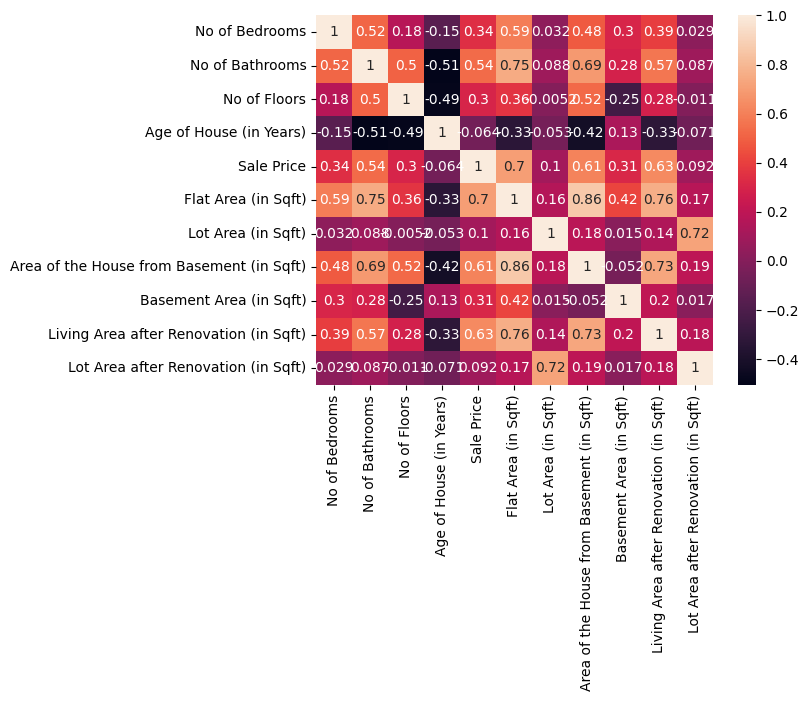

In [54]:
sns.heatmap(original_data_corr,annot = True)